# 예측 모델 실습

### auto-mpg.csv 데이터를 통해,  
### mpg (mile per gallern, 자동차 연비)  를 예측하는 모델을 만드세요.

컬럼 정보 :

MPG (miles per gallon - 연비),

cylinders (실린더 갯수)

engine displacement (inches 배기량),

horsepower (마력),

vehicle weight (lbs. 무게),

time to accelerate from O to 60 mph (sec. 60mph까지 걸리는 시간),

model year ,

origin of car (1. American,   2. European,   3. Japanese).

Also provided are the car labels (types)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
df = pd.read_csv('../data/auto-mpg.csv')

In [4]:
df.head(3)

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


In [5]:
df.isna().sum()

mpg       0
cyl       0
displ     0
hp        0
weight    0
accel     0
yr        0
origin    0
name      0
dtype: int64

In [6]:
df.head(3)

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


In [7]:
y = df['mpg']

In [9]:
X = df.loc[ :  , 'cyl' : 'origin' ]

In [10]:
X.head(3)

,cyl,displ,hp,weight,accel,yr,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1


In [11]:
y.head(3)

0    18.0
1    15.0
2    18.0
Name: mpg, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 10)

In [14]:
from sklearn.linear_model import LinearRegression

In [16]:
regressor = LinearRegression()

In [18]:
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
y_pred = regressor.predict(X_test)

In [21]:
y_test

241    21.5
366    29.0
298    23.9
341    35.1
263    17.5
       ... 
299    34.2
119    19.0
97     16.0
188    14.5
101    26.0
Name: mpg, Length: 79, dtype: float64

In [22]:
y_pred

array([26.8694415 , 30.1359616 , 22.1742087 , 36.53250702, 17.40065177,
       19.95268797, 17.0955313 ,  6.75673096, 31.22164424, 26.44836891,
       20.10405663, 21.06318646, 28.5293448 , 30.0974554 , 11.87245879,
       14.84417326, 20.80788165, 28.72326382,  7.54161749, 11.10781391,
       16.84105765, 31.21094787, 19.47489867, 16.80307735, 14.04343542,
       10.50549855, 17.30629807, 32.17933072, 24.05840095, 20.36945315,
       21.55290472, 23.66391089, 29.24297423, 22.81795596, 23.81846441,
       28.27924062, 31.94173646, 19.93352781, 15.3064094 , 27.95127733,
       21.43441857, 20.99259601, 30.60304247, 26.78774897, 22.6406692 ,
       12.21475949, 14.4091074 , 32.73300482, 22.98817204, 29.22518653,
       25.4617192 , 10.75663032, 21.69733712, 12.6450934 , 15.42418158,
       28.34001207, 23.00790821, 25.76042512, 27.96836919, 25.96460085,
       33.3748554 , 24.50086422, 21.19640525, 21.33075879, 32.24447815,
       28.61683894,  9.87290356, 26.80932624, 22.02052565, 13.16

In [26]:
((y_test - y_pred)**2).mean()  # MSE

13.208829786709867

In [29]:
df_test = y_test.to_frame()

In [31]:
df_test['y_pred'] = y_pred

In [34]:
df_test.reset_index(drop=True, inplace=True)

In [35]:
df_test

,mpg,y_pred
0,21.5,26.869442
1,29.0,30.135962
2,23.9,22.174209
3,35.1,36.532507
4,17.5,17.400652
...,...,...
74,34.2,29.551942
75,19.0,21.650167
76,16.0,19.726739
77,14.5,15.617523


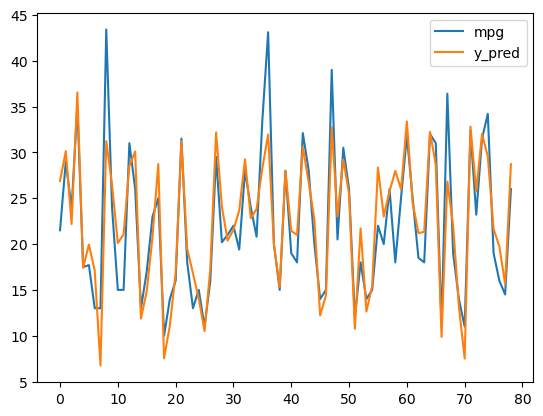

In [37]:
df_test.plot()
plt.show()